### Bibliotecas necessárias


In [1171]:
# Implementation of matplotlib function
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import time as t



### Abrir imagem

Altura da imagem: 396 | Largura da imagem: 371


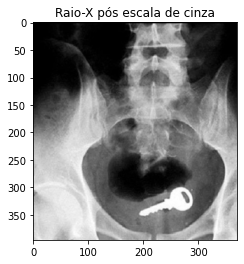

In [1172]:
ddepth = cv2.CV_16UC1
scale = 1
delta = 0
alpha = 2
beta = 50

def loadImage(image: str):

    image = cv2.imread("image5.png", cv2.IMREAD_COLOR) ## CHAVE ALTO CONSTRASTE
    #image = cv2.imread("image2.jpg", cv2.IMREAD_COLOR) ## CIRCULO - MOEDA
    #image = cv2.imread("image6.jpg", cv2.IMREAD_COLOR) ## Linha fina - sobel
    #image = cv2.imread("image7.jfif", cv2.IMREAD_COLOR) ##CIRCULAR
    #image = cv2.imread("image10.jpg", cv2.IMREAD_COLOR) ## Linha - sobel
    #image = cv2.imread("image11.png", cv2.IMREAD_COLOR) ## Linha - sobel
    (height, width) = image.shape[:2]
    print("Altura da imagem: {} | Largura da imagem: {}".format(height, width))
    return image
loadedImage = loadImage("image5.png")

plt.imshow(loadedImage)
plt.title("Raio-X pós escala de cinza")
plt.show()

In [1173]:
def teste():
    print("TESTE")

### Conversão para escala de cinza

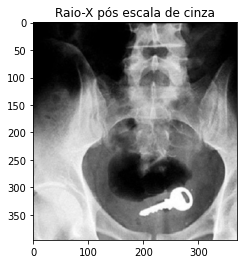

In [1174]:

def toGrayScale(image):
    grayScale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Converte para escala de cinza
    return grayScale

grayImage = toGrayScale(loadedImage)
plt.imshow(grayImage)
plt.title("Raio-X pós escala de cinza")
plt.show()


### Aplicação de um filtro gaussiano

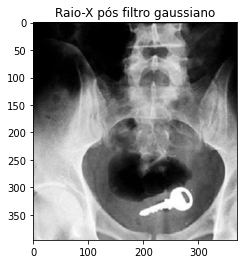

In [1175]:
#imageGauss = cv2.GaussianBlur(grayImage, (3, 3), 0)
def gaussFilter(image):
    gaussFilteredImage = cv2.medianBlur(image, 1)
    return gaussFilteredImage
    
imageGauss = gaussFilter(grayImage)
plt.imshow(imageGauss)
plt.title('Raio-X pós filtro gaussiano')
plt.show()

### Ajuste de brilho e contraste
- Implementação de uma escala de ajuste para brilho e contraste, intervalo [-127, 127] semelhante ao GIMP

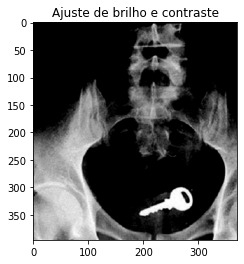

In [1176]:
def gimpBrightContrastControl(image, brightness: float, contrast: float):

    brightness = brightness # brilho inicial 100
    contrast = contrast # contraste inicial 50
    shadow = 0
    highlight = 255 + brightness

    alpha_b = (highlight - shadow)/255
    gamma_b = shadow
    brightContrastProcImage = cv2.addWeighted(image, alpha_b, image, 0, gamma_b)
    f = 131*(contrast + 127)/(127*(131-contrast)) 
    alpha_c = f
    gamma_c = 127*(1-f)
    brightContrastProcImage = cv2.addWeighted(brightContrastProcImage, alpha_c, brightContrastProcImage, 0, gamma_c)

    return brightContrastProcImage

adjustedContrastBrightImg = gimpBrightContrastControl(imageGauss, -100, 50) #Padrão para ajuste
plt.imshow(adjustedContrastBrightImg)
plt.title('Ajuste de brilho e contraste')
plt.show()

### Gradiente X - Sobel

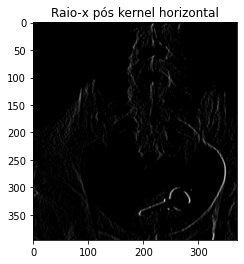

In [1177]:
def applySobelGradientX(image):   
    grad_x = cv2.Sobel(image, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    return grad_x

xSobelGradient = applySobelGradientX(adjustedContrastBrightImg)
plt.imshow(xSobelGradient)
plt.title("Raio-x pós kernel horizontal")
plt.show()

### Gradiente Y - Sobel

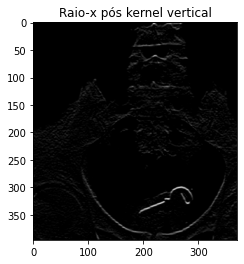

In [1178]:

def applySobelGradientY(image):   
    grad_y = cv2.Sobel(image, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    return grad_y

ySobelGradient = applySobelGradientY(adjustedContrastBrightImg)
plt.imshow(ySobelGradient)
plt.title("Raio-x pós kernel vertical")
plt.show()

### Conjugação dos resultados dos gradientes

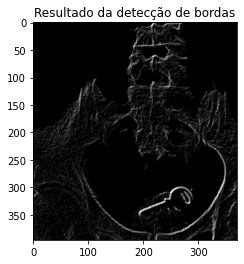

In [1179]:
def mergeGradients(grad_x, grad_y):
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    imgSobel = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return imgSobel

imgSobel = mergeGradients(xSobelGradient, ySobelGradient)
plt.imshow(imgSobel)
plt.title("Resultado da detecção de bordas")
plt.show()

Altura da imagem sobel: 396 | Largura da imagem sobel: 371
0 - 87462.0
1 - 1539.0
2 - 3033.0
3 - 1203.0
4 - 3023.0
5 - 1166.0
6 - 2713.0
7 - 1106.0
8 - 2708.0
9 - 1016.0
10 - 2514.0
11 - 989.0
12 - 2338.0
13 - 935.0
14 - 2071.0
15 - 908.0
16 - 1807.0
17 - 914.0
18 - 1718.0
19 - 818.0
20 - 1571.0
21 - 762.0
22 - 1343.0
23 - 756.0
24 - 1145.0
25 - 719.0
26 - 1053.0
27 - 642.0
28 - 1036.0
29 - 546.0
30 - 911.0
31 - 532.0
32 - 820.0
33 - 384.0
34 - 788.0
35 - 335.0
36 - 685.0
37 - 372.0
38 - 649.0
39 - 299.0
40 - 498.0
41 - 328.0
42 - 446.0
43 - 309.0
44 - 396.0
45 - 280.0
46 - 368.0
47 - 258.0
48 - 315.0
49 - 215.0
50 - 344.0
51 - 183.0
52 - 334.0
53 - 130.0
54 - 293.0
55 - 152.0
56 - 259.0
57 - 142.0
58 - 197.0
59 - 148.0
60 - 194.0
61 - 141.0
62 - 160.0
63 - 130.0
64 - 155.0
65 - 107.0
66 - 162.0
67 - 103.0
68 - 162.0
69 - 85.0
70 - 165.0
71 - 72.0
72 - 144.0
73 - 75.0
74 - 122.0
75 - 79.0
76 - 123.0
77 - 85.0
78 - 98.0
79 - 73.0
80 - 102.0
81 - 75.0
82 - 86.0
83 - 63.0
84 - 68.0
85 - 4

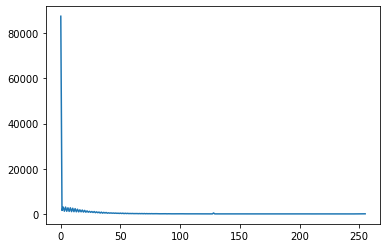

In [1180]:
(height, width) = imgSobel.shape[:2]
print("Altura da imagem sobel: {} | Largura da imagem sobel: {}".format(height, width))

histSize = 256
histRange = (0, 256) # O limite superior é exclusivo
accumulate = False 
hist = cv2.calcHist([imgSobel], [0], None, [histSize], histRange, accumulate=accumulate)

total = 0

#print(hist[255][0])
#print(hist)
for i in range(0, histSize):
    if(hist[i][0] != 0):
        print("{} - {}".format(i, hist[i][0]))

plt.plot(hist)


180.0


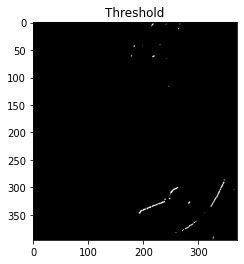

In [1181]:
def applyThreshold(image, minThres: float, maxThres: float):
    ret, imgThreshold = cv2.threshold(image, minThres, maxThres, cv2.THRESH_BINARY) ##CANNY
    print(ret)
    return imgThreshold

imageThreshold = applyThreshold(imgSobel, 180, 255) #121, 255
plt.imshow(imageThreshold)
plt.title("Threshold")
plt.show()


### Detecção de linhas

5


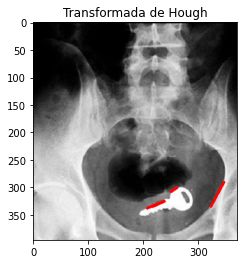

In [1182]:
def applyHoughTransformLines(image, threshold, minLineLength, maxLineGap):
    lines = cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=threshold, minLineLength=minLineLength,maxLineGap = maxLineGap) ## COM THRESHOLD
    return lines

detectedLines = applyHoughTransformLines(imageThreshold, 30, 3, 1) #30, 3, 1

try:
    if(detectedLines.any != None):
        print(len(detectedLines))

        for line in detectedLines:
            x1, y1, x2, y2 = line[0]
            #print(line[0])
            cv2.line(loadedImage, (x1, y1), (x2, y2), (255,0,0),4)
        plt.imshow(loadedImage)
        plt.title("Transformada de Hough")
        plt.show()
except:
    print("Nenhuma linha foi identificada nesta imagem")

### Detecção de círculos

1


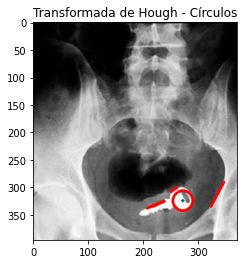

In [1183]:
def applyHoughTransformCircles(image, minRadius, maxRadius):
    rows = image.shape[0]
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                param1=170, param2=30,
                                minRadius=minRadius, maxRadius=maxRadius)
    return circles

detectedCircles = applyHoughTransformCircles(imageGauss, 0, 70) #0,70
try:
    print(len(detectedCircles[0]))
    if detectedCircles is not None:
            circles = np.uint16(np.around(detectedCircles))
            for i in circles[0, :]:
                center = (i[0], i[1])
                # circle center
                cv2.circle(loadedImage, center, 1, (0, 100, 100), 3)
                # circle outline
                radius = i[2]
                cv2.circle(loadedImage, center, radius, (255, 0, 0), 3)
except:
    print("Nenhum círculo foi encontrado")



plt.imshow(loadedImage)
plt.title("Transformada de Hough - Círculos")
plt.show()
